In [27]:
!pip install nltk scikit-learn textblob matplotlib-venn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob
import nltk

In [3]:
import pandas as pd
from google.cloud import storage
import io 

# Set your GCP bucket and file path
bucket_name = 'faq_buck'
file_name = 'FAQ_Folder/FAQ_assist_final_utf8.csv'

# Authenticate with GCP (if necessary)
# If you're already authenticated in your Workbench environment, you might skip this step

# Access the GCP storage client
storage_client = storage.Client()

# Access the bucket
bucket = storage_client.bucket(bucket_name)

# Access the blob (file) within the bucket
blob = bucket.blob(file_name)

# Download the blob's content as a string
data = blob.download_as_string()

# Convert the string content to a Pandas DataFrame
df = pd.read_csv(io.BytesIO(data))

# Now you can work with your DataFrame (df) as needed
print(df.head())  # Display the first few rows of the DataFrame


  1. **What should I do if I'm uncomfortable sharing my full credit card number over the phone?**  \
0  2. **My credit card payment was declined due t...                                                
1  3. **How can I resolve a credit card payment d...                                                
2  4. **What happens after I report a payment dec...                                                
3  5. **How long does it take to resolve a credit...                                                
4  6. **Can a payment be declined for reasons oth...                                                

  A: For security reasons, if you're uncomfortable sharing your full credit card number over the phone, you can request alternative verification methods from the customer service representative. Many companies allow verification with just the last four digits of your card and additional personal information, such as your billing address or the answer to a security question. This minimizes t

In [4]:
df.columns = ["Question", "Answer"]

In [5]:
display(df)

,Question,Answer
0,2. **My credit card payment was declined due t...,"A: First, verify your account balance through ..."
1,3. **How can I resolve a credit card payment d...,A: Resolving a credit card decline involves id...
2,4. **What happens after I report a payment dec...,"A: After reporting a payment decline, the cust..."
3,5. **How long does it take to resolve a credit...,A: The resolution time for a credit card payme...
4,6. **Can a payment be declined for reasons oth...,"A: Yes, payments can be declined for several r..."
5,7. **What if my payment issue persists after b...,A: If you continue to experience problems afte...
6,8. **How do I prevent credit card fraud?**,A: Preventing credit card fraud involves sever...
7,9. **My card was blocked for suspicious activi...,A: If your card is blocked due to suspicious a...
8,10. **What to do if I lose my credit card?**,A: Report the lost or stolen credit card to yo...
9,11. **How can I update my billing information ...,A: To update your billing information for subs...


In [6]:
# Basic Statistics
num_questions = len(df)
num_answers = df["Answer"].nunique()  # Count unique answers
missing_values = df.isnull().sum()

print("Number of questions:", num_questions)
print("Number of unique answers:", num_answers)
print("Missing values:", missing_values)

Number of questions: 17
Number of unique answers: 17
Missing values: Question    0
Answer      0
dtype: int64


In [7]:
# Length of Questions and Answers
df["Question_Length"] = df["Question"].apply(lambda x: len(x.split()))
df["Answer_Length"] = df["Answer"].apply(lambda x: len(x.split()))

question_stats = df["Question_Length"].describe()
answer_stats = df["Answer_Length"].describe()

print("\nQuestion Length Stats:\n", question_stats)
print("\nAnswer Length Stats:\n", answer_stats)


Question Length Stats:
 count    17.000000
mean     11.294118
std       2.778595
min       7.000000
25%      10.000000
50%      11.000000
75%      12.000000
max      20.000000
Name: Question_Length, dtype: float64

Answer Length Stats:
 count    17.000000
mean     71.647059
std       8.022945
min      55.000000
25%      68.000000
50%      72.000000
75%      77.000000
max      87.000000
Name: Answer_Length, dtype: float64


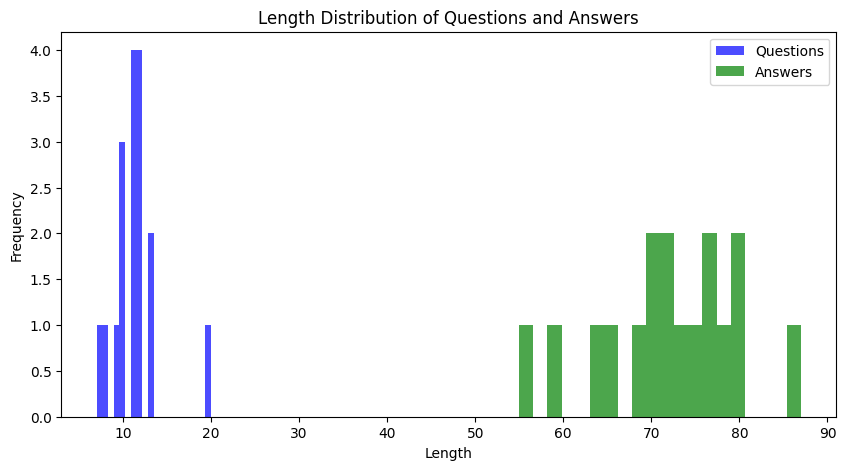

In [8]:
# Visualize Length Distribution
plt.figure(figsize=(10, 5))
plt.hist(df["Question_Length"], bins=20, alpha=0.7, color="blue", label="Questions")
plt.hist(df["Answer_Length"], bins=20, alpha=0.7, color="green", label="Answers")
plt.title("Length Distribution of Questions and Answers")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [22]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import pandas as pd

nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")

# Word Frequency Analysis
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum() and token not in stop_words]
    return filtered_tokens

# Apply preprocessing to questions and answers
df["Question_Preprocessed"] = df["Question"].apply(preprocess_text)
df["Answer_Preprocessed"] = df["Answer"].apply(preprocess_text)

# Flatten preprocessed tokens for word frequency analysis
question_tokens = [token for sublist in df["Question_Preprocessed"] for token in sublist]
answer_tokens = [token for sublist in df["Answer_Preprocessed"] for token in sublist]

# Calculate word frequency
question_freq = pd.Series(question_tokens).value_counts().head(10)
answer_freq = pd.Series(answer_tokens).value_counts().head(10)

print("\nTop 10 frequent words in questions:\n", question_freq)
print("\nTop 10 frequent words in answers:\n", answer_freq)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jupyter/nltk_data...



Top 10 frequent words in questions:
 card            13
credit          11
payment          8
declined         3
issue            2
blocked          2
insufficient     2
fund             2
resolve          2
decline          2
Name: count, dtype: int64

Top 10 frequent words in answers:
 card           36
credit         28
bank           17
payment        14
transaction    14
account        13
issue          12
contact        11
service        11
may             9
Name: count, dtype: int64


In [10]:
!pip install plotly

In [11]:
!pip install nbformat>=4.2.0

In [23]:
df_q = pd.DataFrame(question_freq)
df_q

,count
card,13
credit,11
payment,8
declined,3
issue,2
blocked,2
insufficient,2
fund,2
resolve,2
decline,2


In [24]:
df_q.reset_index(inplace=True)

In [25]:
df_q

,index,count
0,card,13
1,credit,11
2,payment,8
3,declined,3
4,issue,2
5,blocked,2
6,insufficient,2
7,fund,2
8,resolve,2
9,decline,2


In [26]:
df_a = pd.DataFrame(answer_freq)
df_a.reset_index(inplace=True)
df_a

,index,count
0,card,36
1,credit,28
2,bank,17
3,payment,14
4,transaction,14
5,account,13
6,issue,12
7,contact,11
8,service,11
9,may,9


<Axes: xlabel='index', ylabel='count'>

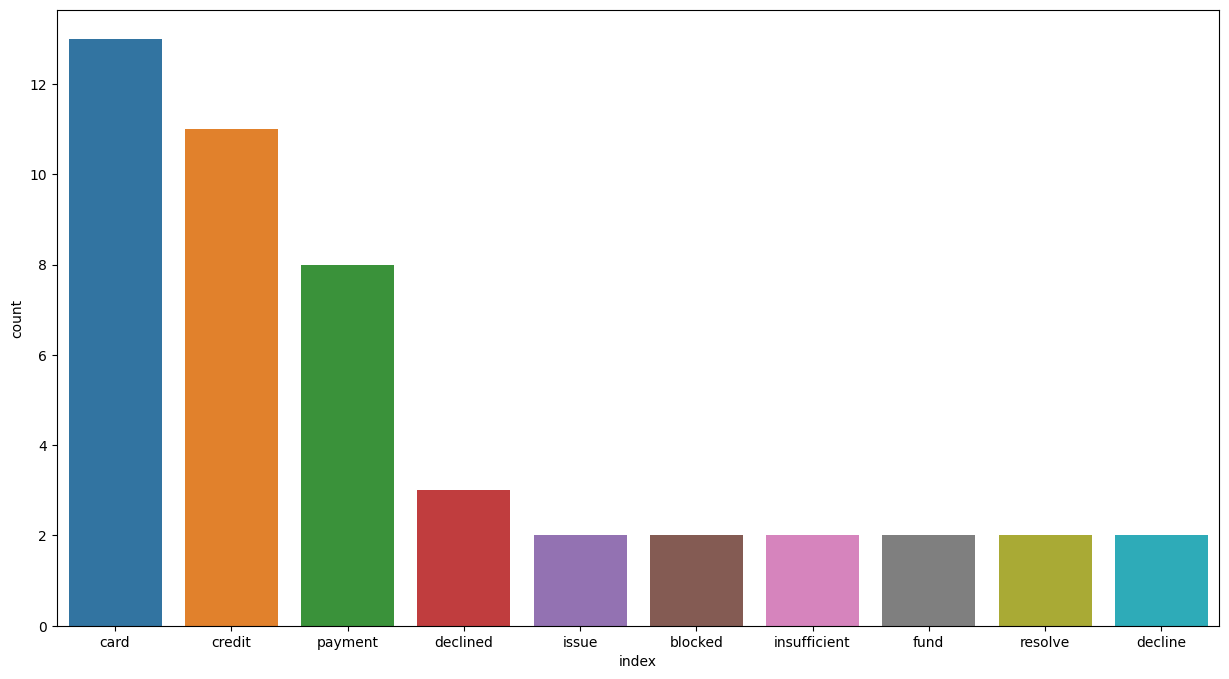

In [27]:
import pandas as pd
import plotly.graph_objs as go
import seaborn as sns
plt.figure(figsize=(15,8))
sns.barplot(data=df_q, x="index", y = "count")

<Axes: xlabel='index', ylabel='count'>

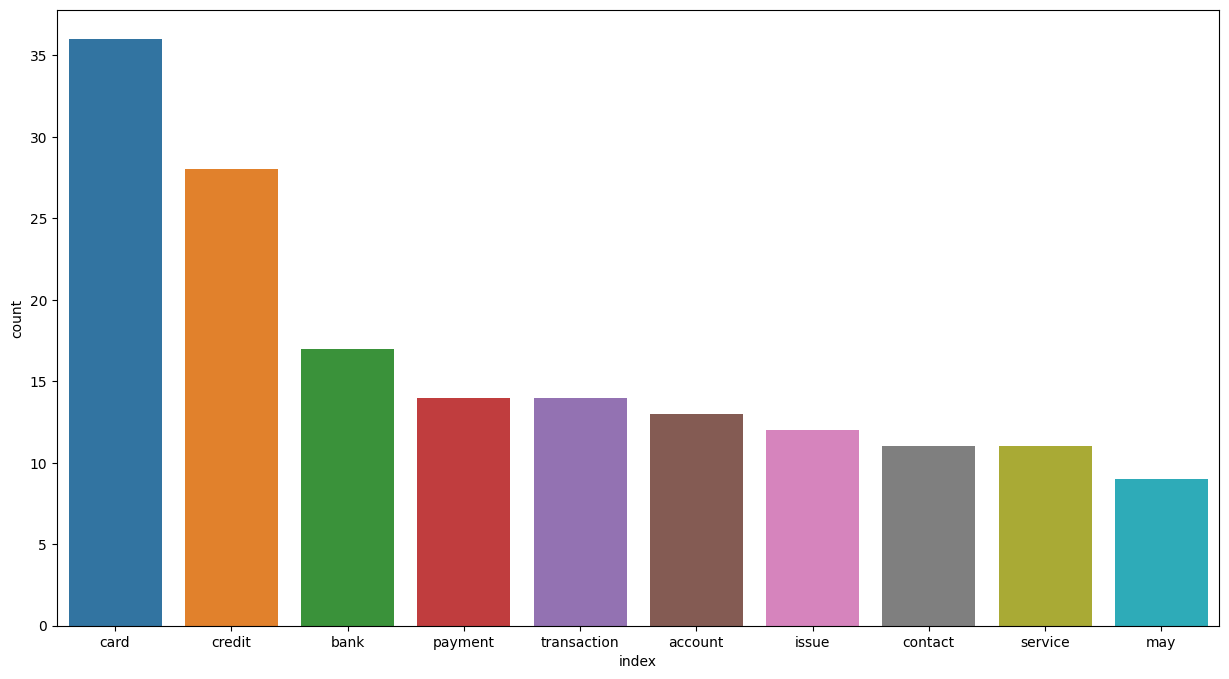

In [28]:
plt.figure(figsize=(15,8))
sns.barplot(data=df_a, x="index", y = "count")


Top words for each topic:
Topic 1: verify, was, including, should, unusual, then, using, cards, again, directly
Topic 2: the, your, card, credit, to, can, and, or, for, payment
Topic 3: verify, was, including, should, unusual, then, using, cards, again, directly
Topic 4: the, to, or, your, service, you, customer, issue, payment, for
Topic 5: your, card, to, credit, and, if, bank, for, is, activity


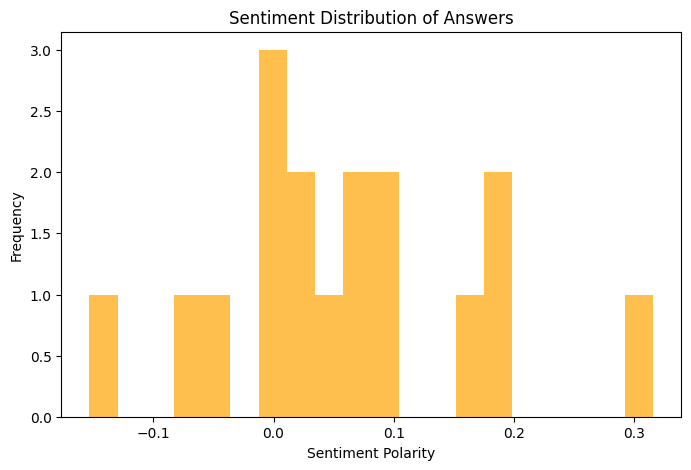

In [29]:
# Similarity Analysis (using Cosine Similarity)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["Question"] + " " + df["Answer"])
cosine_sim = cosine_similarity(X, X)

# Topic Modeling (using Latent Dirichlet Allocation)
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)
feature_names = vectorizer.get_feature_names_out()
topics = []
for topic_idx, topic in enumerate(lda.components_):
    topics.append([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]])

print("\nTop words for each topic:")
for i, topic in enumerate(topics):
    print(f"Topic {i+1}: {', '.join(topic)}")

# Sentiment Analysis
df["Answer_Sentiment"] = df["Answer"].apply(lambda x: TextBlob(x).sentiment.polarity)

# Visualize Sentiment Distribution
plt.figure(figsize=(8, 5))
plt.hist(df["Answer_Sentiment"], bins=20, alpha=0.7, color="orange")
plt.title("Sentiment Distribution of Answers")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.show()

In [30]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib_venn import venn2

# Merge the dataframes on the 'Word' column
merged_df = pd.merge(df_q, df_a, on='index', suffixes=('_df1', '_df2'), how='outer').fillna(0)
display(merged_df)

,index,count_df1,count_df2
0,account,0.0,13.0
1,bank,0.0,17.0
2,blocked,2.0,0.0
3,card,13.0,36.0
4,contact,0.0,11.0
5,credit,11.0,28.0
6,decline,2.0,0.0
7,declined,3.0,0.0
8,fund,2.0,0.0
9,insufficient,2.0,0.0


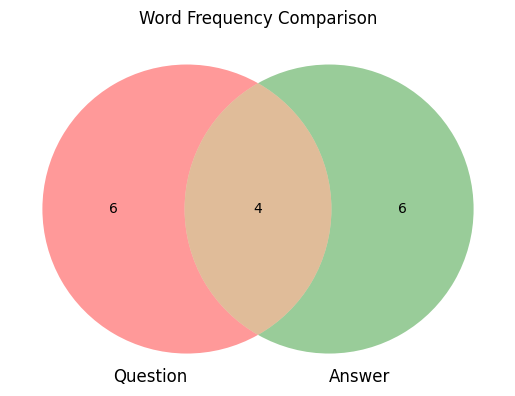

In [31]:
# Create sets of words for each dataframe
set_df1 = set(merged_df['index'][merged_df['count_df1'] > 0])
set_df2 = set(merged_df['index'][merged_df['count_df2'] > 0])

# Plot the Venn diagram
venn2([set_df1, set_df2], ('Question', 'Answer'))
plt.title('Word Frequency Comparison')
plt.show()

In [32]:
print([set_df1, set_df2])

[{'fund', 'resolve', 'blocked', 'declined', 'decline', 'issue', 'card', 'credit', 'payment', 'insufficient'}, {'bank', 'transaction', 'account', 'may', 'service', 'contact', 'issue', 'card', 'credit', 'payment'}]
